# GNN Training Results Analysis

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# SAE Configuration
LATENT_DIM = 128  # Options: 128, 256, 512, 1024
K = 8           # Options: 8, 16, 32

# Construct file paths based on config
sae_metrics_file = f'outputs/sae_metrics_latent{LATENT_DIM}_k{K}.json'
checkpoint_path = f"checkpoints/sae_latent{LATENT_DIM}_k{K}.pt"

print(f"Analyzing SAE Configuration:")
print(f"  latent_dim = {LATENT_DIM}")
print(f"  k = {K}")
print(f"  Expected sparsity: {K}/{LATENT_DIM} = {100*K/LATENT_DIM:.2f}% active")
print(f"\nMetrics file: {sae_metrics_file}")
print(f"Checkpoint: {checkpoint_path}")

Analyzing SAE Configuration:
  latent_dim = 128
  k = 8
  Expected sparsity: 8/128 = 6.25% active

Metrics file: outputs/sae_metrics_latent128_k8.json
Checkpoint: checkpoints/sae_latent128_k8.pt


# Configuration

Set the SAE configuration to analyze. Change these values to analyze different trained models.

In [3]:
with open('outputs/training_metrics.json', 'r') as f:
    metrics = json.load(f)

with open('outputs/motif_metrics.json', 'r') as f:
    motif_metrics = json.load(f)

with open('outputs/train_graph_ids.json', 'r') as f:
    train_graph_ids = json.load(f)['graph_ids']

with open('outputs/val_graph_ids.json', 'r') as f:
    val_graph_ids = json.load(f)['graph_ids']

with open('outputs/test_graph_ids.json', 'r') as f:
    test_graph_ids = json.load(f)['graph_ids']

print("Loaded training metrics")
print(f"Number of epochs: {len(metrics['train_loss'])}")
print(f"Best epoch: {metrics['best_epoch']}")
print(f"Best val loss: {metrics['best_val_loss']:.6f}")
print(f"Test loss: {metrics['test_loss']:.6f}")
print(f"\nDataset split:")
print(f"  Train: {len(train_graph_ids)} graphs")
print(f"  Val: {len(val_graph_ids)} graphs")
print(f"  Test: {len(test_graph_ids)} graphs")

Loaded training metrics
Number of epochs: 63
Best epoch: 38
Best val loss: 0.004476
Test loss: 0.003729

Dataset split:
  Train: 4000 graphs
  Val: 500 graphs
  Test: 400 graphs


## Training Progress Over Epochs


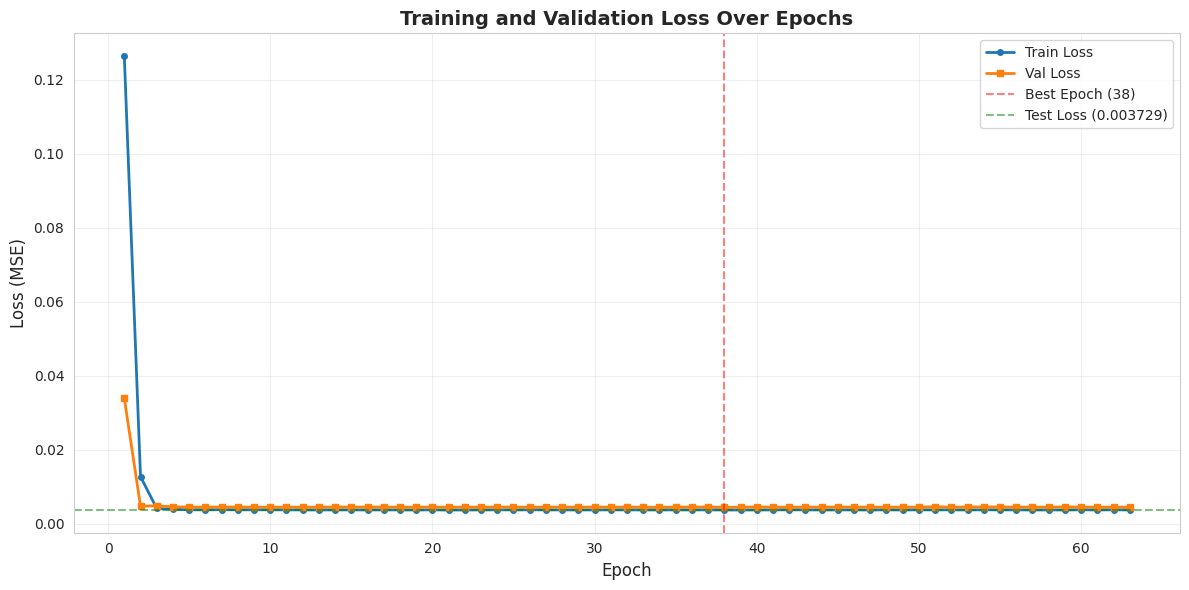


Final Training Loss: 0.003773
Final Validation Loss: 0.004520
Best Validation Loss: 0.004476 (Epoch 38)
Test Loss: 0.003729


In [4]:
epochs = np.arange(1, len(metrics['train_loss']) + 1)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(epochs, metrics['train_loss'], label='Train Loss', marker='o', markersize=4, linewidth=2)
ax.plot(epochs, metrics['val_loss'], label='Val Loss', marker='s', markersize=4, linewidth=2)
ax.axvline(x=metrics['best_epoch'], color='red', linestyle='--', alpha=0.5, label=f"Best Epoch ({metrics['best_epoch']})")
ax.axhline(y=metrics['test_loss'], color='green', linestyle='--', alpha=0.5, label=f"Test Loss ({metrics['test_loss']:.6f})")
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss (MSE)', fontsize=12)
ax.set_title('Training and Validation Loss Over Epochs', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/paper_figures/training_progress.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFinal Training Loss: {metrics['train_loss'][-1]:.6f}")
print(f"Final Validation Loss: {metrics['val_loss'][-1]:.6f}")
print(f"Best Validation Loss: {metrics['best_val_loss']:.6f} (Epoch {metrics['best_epoch']})")
print(f"Test Loss: {metrics['test_loss']:.6f}")

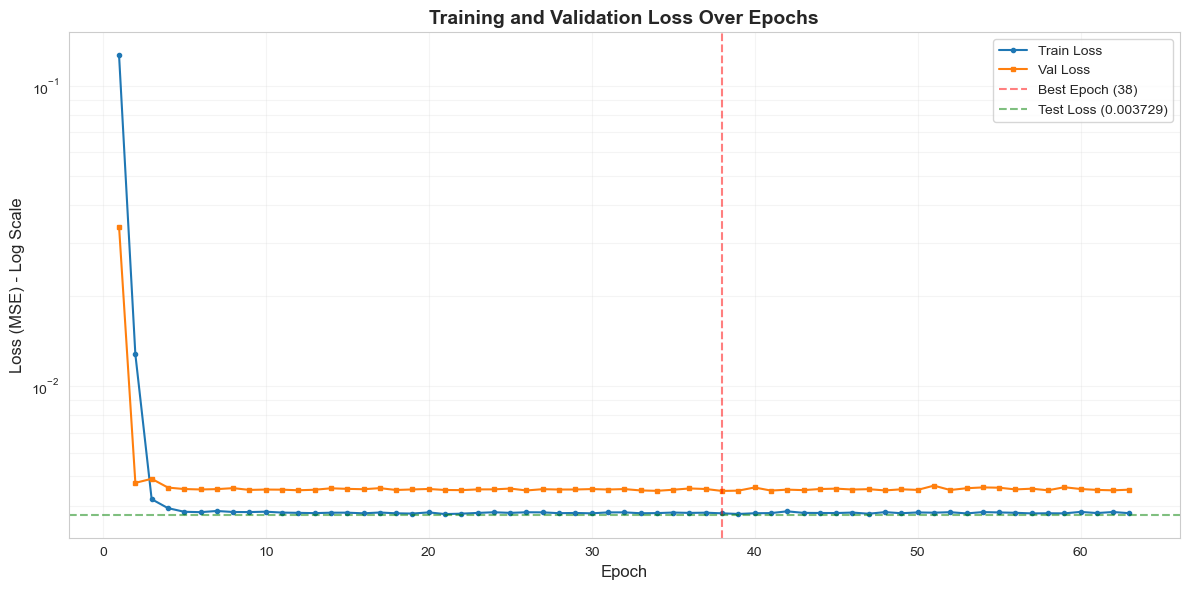


Final Training Loss: 0.003773
Final Validation Loss: 0.004520
Best Validation Loss: 0.004476 (Epoch 38)
Test Loss: 0.003729


In [4]:
# Assuming 'metrics' dictionary is already loaded
epochs = np.arange(1, len(metrics['train_loss']) + 1)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot lines
ax.plot(epochs, metrics['train_loss'], label='Train Loss', marker='o', markersize=3, linewidth=1.5)
ax.plot(epochs, metrics['val_loss'], label='Val Loss', marker='s', markersize=3, linewidth=1.5)

# Reference lines
ax.axvline(x=metrics['best_epoch'], color='red', linestyle='--', alpha=0.5, label=f"Best Epoch ({metrics['best_epoch']})")
ax.axhline(y=metrics['test_loss'], color='green', linestyle='--', alpha=0.5, label=f"Test Loss ({metrics['test_loss']:.6f})")

# --- THE FIX: Logarithmic Scale ---
ax.set_yscale('log')
# Optional: Set y-limits to zoom in further if needed (e.g., ignoring extreme outliers)
# ax.set_ylim(bottom=1e-4) 

ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Loss (MSE) - Log Scale', fontsize=12)
ax.set_title('Training and Validation Loss Over Epochs', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, which="both", ls="-", alpha=0.2) # 'both' adds gridlines for log sub-ticks

plt.tight_layout()
plt.savefig('outputs/paper_figures/training_progress.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFinal Training Loss: {metrics['train_loss'][-1]:.6f}")
print(f"Final Validation Loss: {metrics['val_loss'][-1]:.6f}")
print(f"Best Validation Loss: {metrics['best_val_loss']:.6f} (Epoch {metrics['best_epoch']})")
print(f"Test Loss: {metrics['test_loss']:.6f}")

In [5]:
# Load SAE metrics with configuration-based path
if not Path(sae_metrics_file).exists():
    print(f"ERROR: Metrics file not found: {sae_metrics_file}")
    print("\nAvailable SAE configurations:")
    available = list(Path('outputs').glob('sae_metrics_*.json'))
    if available:
        for f in sorted(available):
            print(f"  - {f.name}")
    else:
        print("  No SAE metrics files found in outputs/")
    print("\nPlease update LATENT_DIM and K in the configuration cell above.")
else:
    with open(sae_metrics_file, 'r') as f:
        sae_metrics = json.load(f)

    print("=" * 60)
    print("Sparse Autoencoder Configuration")
    print("=" * 60)
    print(f"Input dimension: {sae_metrics['config']['input_dim']}")
    print(f"Latent dimension: {sae_metrics['config']['latent_dim']}")
    print(f"Expansion factor: {sae_metrics['config']['latent_dim'] / sae_metrics['config']['input_dim']:.1f}x")
    print(f"TopK sparsity: k={sae_metrics['config']['k']} ({100 * sae_metrics['config']['target_sparsity']:.2f}% active)")
    print(f"Learning rate: {sae_metrics['config']['learning_rate']}")
    print(f"Batch size: {sae_metrics['config']['batch_size']}")
    print()
    print("=" * 60)
    print("SAE Training Results")
    print("=" * 60)
    print(f"Number of epochs: {len(sae_metrics['train_history']['train_loss'])}")
    print(f"Best validation loss: {sae_metrics['best_val_loss']:.2e}")
    print(f"Test loss: {sae_metrics['test_loss']:.2e}")
    print(f"Test reconstruction MSE: {sae_metrics['test_reconstruction']:.2e}")
    print(f"Test L0 sparsity: {sae_metrics['test_l0_sparsity']:.4f} ({100 * sae_metrics['test_l0_sparsity']:.2f}% active)")
    print(f"Expected L0 sparsity: {sae_metrics['config']['target_sparsity']:.4f} ({100 * sae_metrics['config']['target_sparsity']:.2f}% active)")
    print("=" * 60)

Sparse Autoencoder Configuration
Input dimension: 64
Latent dimension: 128
Expansion factor: 2.0x
TopK sparsity: k=8 (6.25% active)
Learning rate: 0.0005
Batch size: 1024

SAE Training Results
Number of epochs: 200
Best validation loss: 3.02e-07
Test loss: 3.35e-07
Test reconstruction MSE: 3.35e-07
Test L0 sparsity: 0.0616 (6.16% active)
Expected L0 sparsity: 0.0625 (6.25% active)


# Sparse Autoencoder (SAE) Training Results

## SAE Training Progress

## Understanding L0 Sparsity for TopK SAE

**What is L0 sparsity?**
- L0 = fraction of latent features that are non-zero (active)
- Measures how sparse the learned representations are

**For TopK Sparse Autoencoders:**
- TopK activation **mechanically enforces** that exactly k neurons are active per sample
- **Expected L0 = k / latent_dim** (e.g., k=8, latent_dim=128 → 6.25% active)
- L0 is **not an optimization target** (unlike L1-penalized SAEs)
- L0 is a **verification metric** - it should match the expected value

**How to interpret:**
- ✅ **Good**: Test L0 ≈ Expected L0 (within 0.01%) → TopK is working correctly
- ✅ **Consistency**: Similar L0 across train/val/test → stable sparsity
- ⚠️ **Warning**: L0 deviates from expected → potential implementation issue

**Key difference from L1-based SAE:**
- L1-based SAE: L0 is learned via penalty, varies by sample
- TopK SAE: L0 is fixed by architecture, constant across samples

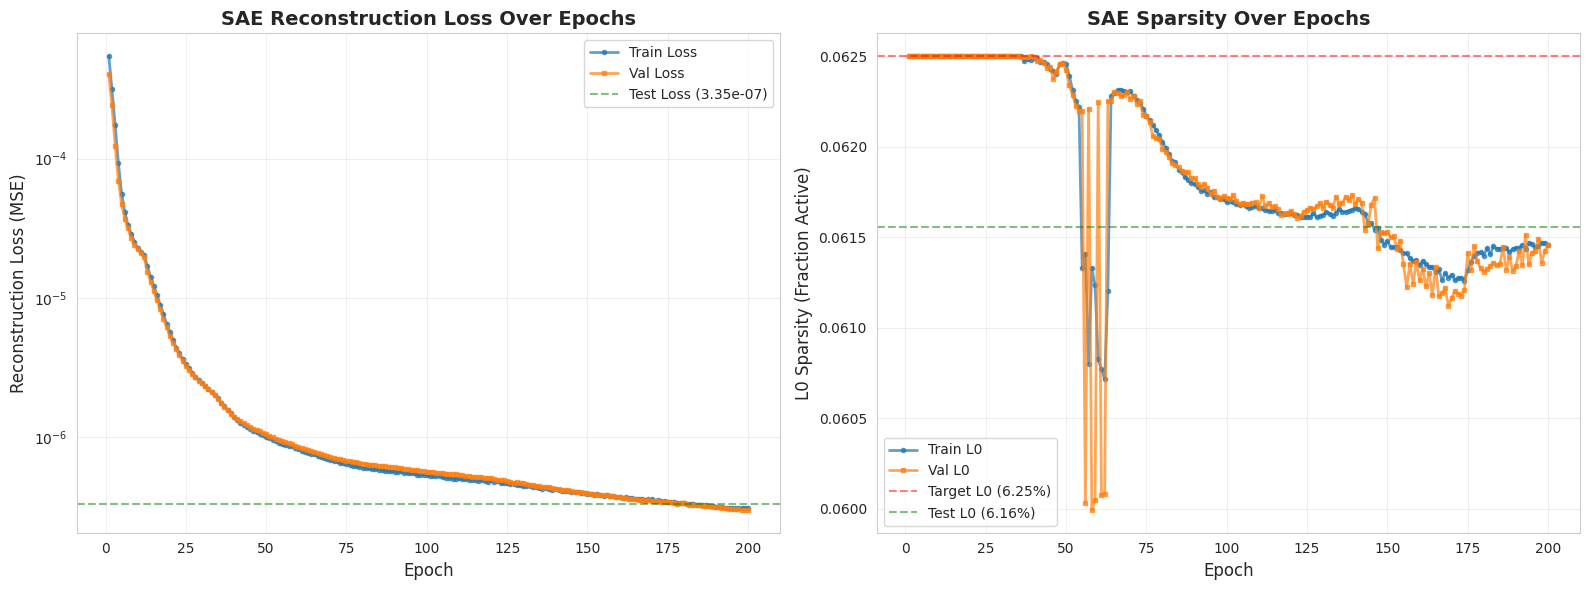


Final Training Loss: 3.13e-07
Final Validation Loss: 3.02e-07
Best Validation Loss: 3.02e-07
Test Loss: 3.35e-07

Final Train L0: 0.0615 (6.15%)
Final Val L0: 0.0615 (6.15%)
Test L0: 0.0616 (6.16%)


In [6]:
# Plot SAE training progress
sae_epochs = np.arange(1, len(sae_metrics['train_history']['train_loss']) + 1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Reconstruction loss
ax = axes[0]
ax.plot(sae_epochs, sae_metrics['train_history']['train_loss'], 
        label='Train Loss', marker='o', markersize=3, linewidth=2, alpha=0.7)
ax.plot(sae_epochs, sae_metrics['train_history']['val_loss'], 
        label='Val Loss', marker='s', markersize=3, linewidth=2, alpha=0.7)
ax.axhline(y=sae_metrics['test_loss'], color='green', linestyle='--', 
           alpha=0.5, label=f"Test Loss ({sae_metrics['test_loss']:.2e})")
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Reconstruction Loss (MSE)', fontsize=12)
ax.set_title('SAE Reconstruction Loss Over Epochs', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.set_yscale('log')
ax.grid(True, alpha=0.3)

# Right plot: L0 sparsity (fraction of active neurons)
ax = axes[1]
ax.plot(sae_epochs, sae_metrics['train_history']['train_l0'], 
        label='Train L0', marker='o', markersize=3, linewidth=2, alpha=0.7)
ax.plot(sae_epochs, sae_metrics['train_history']['val_l0'], 
        label='Val L0', marker='s', markersize=3, linewidth=2, alpha=0.7)
ax.axhline(y=sae_metrics['config']['target_sparsity'], color='red', linestyle='--', 
           alpha=0.5, label=f"Target L0 ({100*sae_metrics['config']['target_sparsity']:.2f}%)")
ax.axhline(y=sae_metrics['test_l0_sparsity'], color='green', linestyle='--', 
           alpha=0.5, label=f"Test L0 ({100*sae_metrics['test_l0_sparsity']:.2f}%)")
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('L0 Sparsity (Fraction Active)', fontsize=12)
ax.set_title('SAE Sparsity Over Epochs', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/paper_figures/sae_training_progress.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFinal Training Loss: {sae_metrics['train_history']['train_loss'][-1]:.2e}")
print(f"Final Validation Loss: {sae_metrics['train_history']['val_loss'][-1]:.2e}")
print(f"Best Validation Loss: {sae_metrics['best_val_loss']:.2e}")
print(f"Test Loss: {sae_metrics['test_loss']:.2e}")
print(f"\nFinal Train L0: {sae_metrics['train_history']['train_l0'][-1]:.4f} ({100*sae_metrics['train_history']['train_l0'][-1]:.2f}%)")
print(f"Final Val L0: {sae_metrics['train_history']['val_l0'][-1]:.4f} ({100*sae_metrics['train_history']['val_l0'][-1]:.2f}%)")
print(f"Test L0: {sae_metrics['test_l0_sparsity']:.4f} ({100*sae_metrics['test_l0_sparsity']:.2f}%)")

## SAE Final Metrics Summary

SAE Final Metrics Summary:
Split  Reconstruction Loss  L0 Sparsity  Active Neurons (%)
Train         3.127626e-07     0.061456            6.145597
  Val         3.015997e-07     0.061456            6.145635
 Test         3.351509e-07     0.061557            6.155672

Target sparsity: 6.25% active (8/128 neurons)
Best validation loss achieved: 3.02e-07


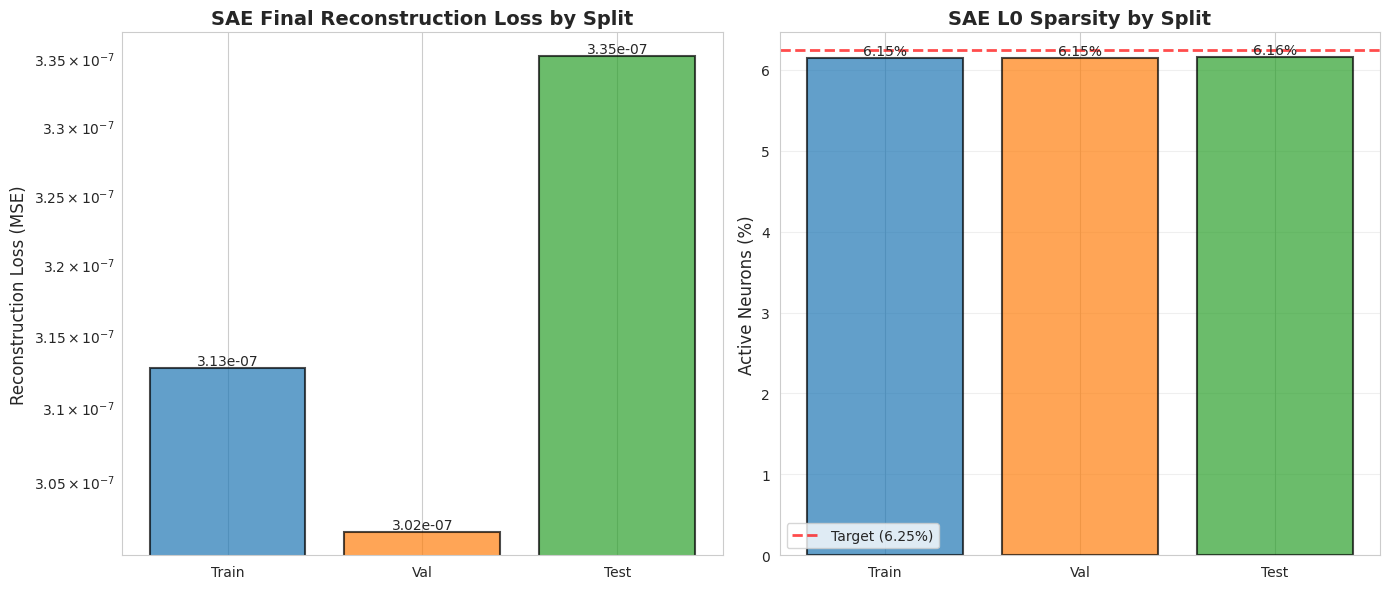

In [7]:
# SAE Final metrics summary
sae_results_df = pd.DataFrame({
    'Split': ['Train', 'Val', 'Test'],
    'Reconstruction Loss': [
        sae_metrics['train_history']['train_loss'][-1], 
        sae_metrics['train_history']['val_loss'][-1], 
        sae_metrics['test_loss']
    ],
    'L0 Sparsity': [
        sae_metrics['train_history']['train_l0'][-1],
        sae_metrics['train_history']['val_l0'][-1],
        sae_metrics['test_l0_sparsity']
    ],
    'Active Neurons (%)': [
        100 * sae_metrics['train_history']['train_l0'][-1],
        100 * sae_metrics['train_history']['val_l0'][-1],
        100 * sae_metrics['test_l0_sparsity']
    ]
})

print("SAE Final Metrics Summary:")
print(sae_results_df.to_string(index=False))
print(f"\nTarget sparsity: {100 * sae_metrics['config']['target_sparsity']:.2f}% active ({sae_metrics['config']['k']}/{sae_metrics['config']['latent_dim']} neurons)")
print(f"Best validation loss achieved: {sae_metrics['best_val_loss']:.2e}")

# Plot final SAE metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Reconstruction loss by split
ax = axes[0]
splits = ['Train', 'Val', 'Test']
losses = [
    sae_metrics['train_history']['train_loss'][-1], 
    sae_metrics['train_history']['val_loss'][-1], 
    sae_metrics['test_loss']
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

bars = ax.bar(splits, losses, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Reconstruction Loss (MSE)', fontsize=12)
ax.set_title('SAE Final Reconstruction Loss by Split', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, loss in zip(bars, losses):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{loss:.2e}',
            ha='center', va='bottom', fontsize=10)

# Right: L0 sparsity by split
ax = axes[1]
sparsities = [
    100 * sae_metrics['train_history']['train_l0'][-1],
    100 * sae_metrics['train_history']['val_l0'][-1],
    100 * sae_metrics['test_l0_sparsity']
]

bars = ax.bar(splits, sparsities, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.axhline(y=100 * sae_metrics['config']['target_sparsity'], color='red', 
           linestyle='--', linewidth=2, alpha=0.7, label=f"Target ({100*sae_metrics['config']['target_sparsity']:.2f}%)")
ax.set_ylabel('Active Neurons (%)', fontsize=12)
ax.set_title('SAE L0 Sparsity by Split', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, sparsity in zip(bars, sparsities):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{sparsity:.2f}%',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('outputs/paper_figures/sae_final_metrics.png', dpi=150, bbox_inches='tight')
plt.show()